In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [ ]:
data= pd.read_csv('hotel_booking.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


First of all The columns :

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
data = data.drop(['name', 'email','phone-number', 'credit_card'] , axis=1)

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Notice that we have missing values on children, country, agent and company columns.
we will deal with them in different ways.

let's start with the company column as it has the laragest numbere of missing values.

In [ ]:
data['company'].unique()[:10]

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.])

We see that the company column does not bring much value to the data because the numbers have no meaning for us in this context.
hence, let's drop company column.

In [ ]:
data=data.drop(['company'], axis=1)

Let' take a look at agent column.

In [ ]:
data.agent.unique()[:10]

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5.])

The agent column is very simialr to company column, it does not bring much value to the data.
let's drop it.

In [ ]:
data = data.drop(['agent'] , axis =1)

Now it comes to children column which has 4 NaN values , let's bring them.

In [ ]:
data[data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


We will assume that these four rows had zero children.

In [ ]:
data.children.fillna(0 , inplace=True)

The rest of missing data are in the country column, let's fill the column with a PlaceHolder.

In [ ]:
data['country'] = data['country'].fillna('Unknown')

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# COOL! , WE GOT RID OF MISSING VALUES.

let's check for reservations made without adults.

In [ ]:
data[data['adults']==0][['adults','children']]

,adults,children
2224,0,0.0
2409,0,0.0
3181,0,0.0
3684,0,0.0
3708,0,0.0
...,...,...
117204,0,2.0
117274,0,2.0
117303,0,2.0
117453,0,2.0


Typically, hotel bookings require at least one adult to be present in the room. The term “adult” generally refers to individuals who are above a certain age, often 18 or 21 years old, depending on the hotel’s policy and local laws12. While children can be included in the booking, they usually cannot stay in the hotel room by themselves without an adult.

So there is a mistake in the booking data where there are entries with no adults and with zero or more children. This error must have happened when the information was first recorded. To correct this, we should remove these incorrect entries.

In [ ]:
data  = data.drop(data[data['adults']==0].index)

Now we need to add some columns to make the analysis more efficient.

In [ ]:
data['total_people'] = data['children'] + data['adults'] + data['babies']
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_weekend_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,0


In [ ]:
# let's look at the shape of data we end up with:
data.shape

(118987, 32)

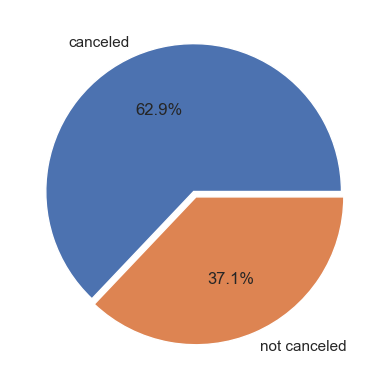

In [ ]:
#NOW WE WANT THE PRECENTAGE OF RESERVATION CANCELLATION.
is_canceled_counts = data.is_canceled.value_counts()

plt.pie(is_canceled_counts ,
        explode=(0.02,0.02),
        labels =['canceled', 'not canceled'],
        autopct = '%.1f%%' )
plt.show()

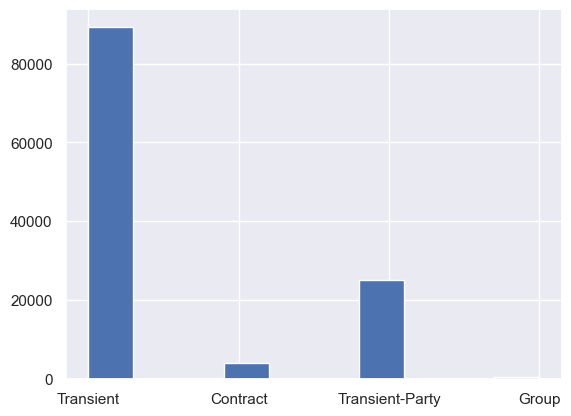

In [ ]:
plt.hist(data.customer_type,bins=10)
plt.show()

The highest number of reservations is made by the customer type Transient as shown above.

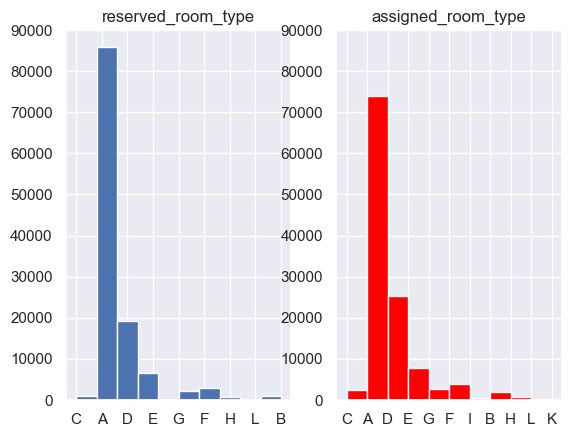

In [ ]:
fig ,axes = plt.subplots(1,2)
axes[0].hist(data.reserved_room_type )
axes[0].set_title('reserved_room_type')
axes[0].set_ylim(0,90000)

axes[1].hist(data.assigned_room_type , color= 'red')
axes[1].set_title('assigned_room_type')
axes[1].set_ylim(0,90000)

plt.show()

Type  room A is the most popular choice, especially for business travelers. This explains why they might appear more booked in the figure, there is a slight difference betweeen the counts of reserved room type and assigned room type due to room availablity and other factors like Maintenance or Repairs.

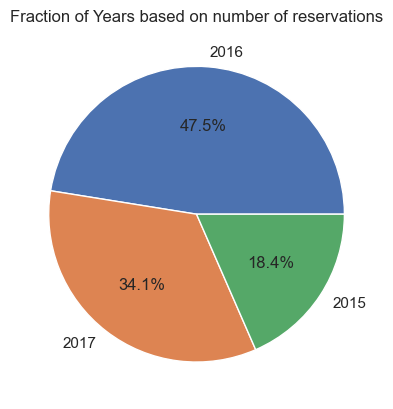

In [ ]:
year_proportion=data['arrival_date_year'].value_counts(normalize = True).to_dict()

plt.pie(year_proportion.values(),labels= year_proportion.keys(), autopct='%.1f%%')
plt.title('Fraction of Years based on number of reservations')
plt.show()

Data shows that 2016 saw the most hotel booking activity, as measured by the total number of reservations.

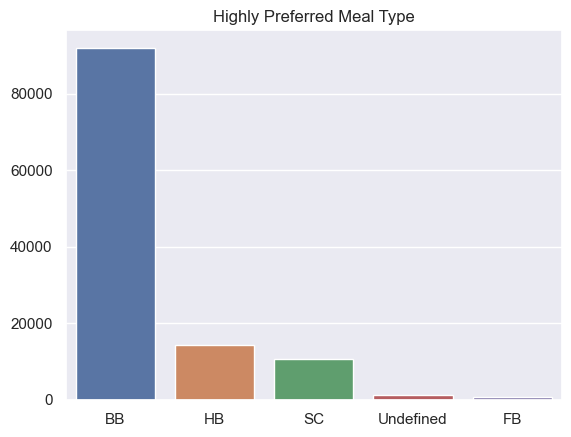

In [ ]:
meal_counts = data.meal.value_counts().to_dict()


b = sns.barplot(
    data=meal_counts,
    x=meal_counts.keys(),
    y=meal_counts.values(),
    hue = meal_counts.keys(),
    palette="deep"
)

plt.title("Highly Preferred Meal Type")
plt.show()

BB (Bed and Breakfast) is the most popular choice, because it's generally the cheapest option compared to HB, FB, or SC.

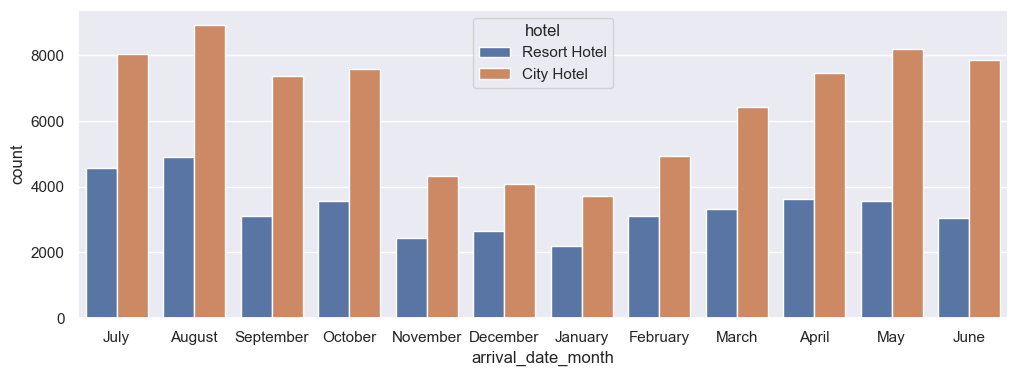

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=data.arrival_date_month,hue=data.hotel)
plt.show()

Now let's move to get to know **lead_time** column.

Note: The lead time in hotel reservations refers to the amount of time between when a guest makes a reservation and their scheduled arrival date.

In [ ]:
mean, median, mode, minimum, maximum, range_values  = [
    data['lead_time'].mean(),
    data['lead_time'].median(),
    data['lead_time'].mode()[0],
    data['lead_time'].min(),
    data['lead_time'].max(),
    data['lead_time'].max() - data['lead_time'].min()
]

print(f'mean: {mean}\nmedian: {median}\n\nmode: {mode}\n\nminimum lead time: {minimum}\nmaximum lead time: {maximum}\nrange: {range_values}')


mean: 104.07053711750024
median: 69.0

mode: 0

minimum lead time: 0
maximum lead time: 737
range: 737


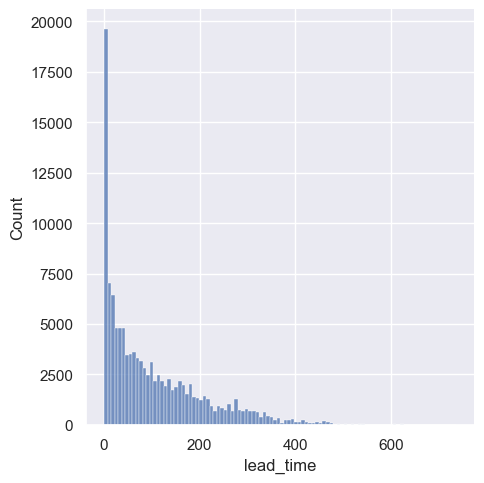

In [ ]:
sns.displot(data = data,x='lead_time',bins=100)
plt.show()

Looking at the lead_time data, it seems like it might follow a pattern where shorter times are more common and longer times are less frequent. This pattern is similar to an exponential distribution. To be sure, let's include it in our tests.

In [ ]:
lead = data['lead_time'].value_counts()

# Perform the KS test for the exponential distribution
ks_statistic, p_value = stats.kstest(lead, 'expon')

print(f"P-value: {p_value:.2f}")


P-value: 0.00


Note that the pvalue is equal to zero,so we wil reject the null hypothesis, therefore the **lead_time variable does not follow exponentail distribution.**

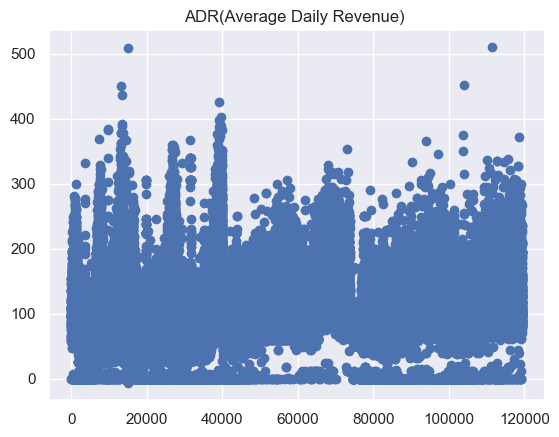

In [ ]:
plt.scatter( data.index , data.adr)
plt.title('ADR(Average Daily Revenue) ')
plt.show()

There is an outlier we will drop it.

In [ ]:
data= data[data.adr< 5000]

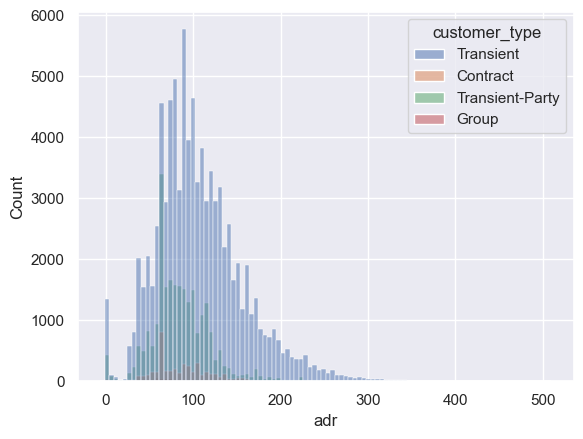

In [ ]:
sns.histplot(data=data , x = 'adr' , bins =100 , hue='customer_type')
plt.show()

In [ ]:
median = data.adr.median()
mean = data.adr.mean()
mode = data.adr.mode()[0]
print( 'mean : ', mean,'\nmedian :  ',median,'\nmode: ',mode)

mean :  101.9635496613047 
median :   95.0 
mode:  62.0


Based on the previous plot and calculations, the ADR variable exhibits a right skew. This indicates that a larger portion of the data falls towards lower values, with a longer tail extending towards higher ADR values.

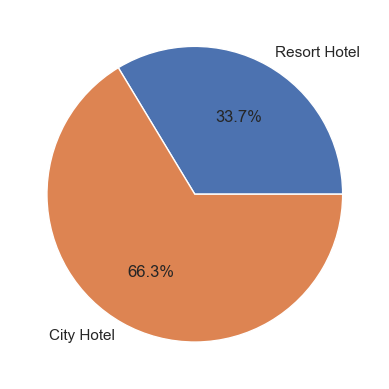

In [ ]:
resort= len(data[data.hotel == 'Resort Hotel'])/len(data)
city= len(data[data.hotel == 'City Hotel'])/len(data)

plt.pie([resort,city] , labels = list(data.hotel.unique()) , autopct = '%.1f%%')
plt.show()

The vast majority of reservations are made in city hotels.

In [ ]:
proportion_country = data['country'].value_counts().to_dict()

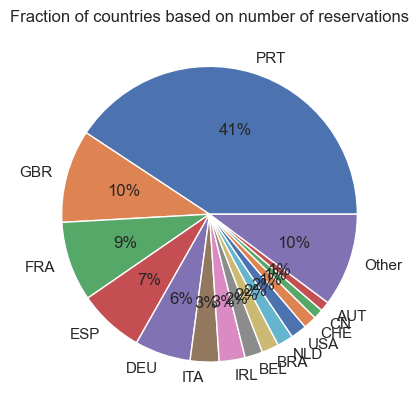

In [ ]:
proportion_country=data['country'].value_counts(normalize = True).to_dict()
names = []
values = []
other = 0
for k,v in proportion_country.items():
    if v >0.01:
        names.append(k)
        values.append(v)
    else:
        other+= v
names.append('Other')
values.append(other)
plt.pie(values,labels= names , autopct = '%.0f%%')
plt.title('Fraction of countries based on number of reservations')
plt.show()

This chart displays the top 14 countries, ranging from Portugal at the top to Austria at the bottom.  The "Other" category encompasses all remaining countries with a contribution of less than 1%, including those classified as "Unknown."

Now we want to get summer data to do further analysis.

In [ ]:
summer_data= data.copy()

In [ ]:
summer_months = ['June' ,'July', 'August',]

summer_data = data[data['arrival_date_month'].isin(summer_months)]

#FOR THE FIRST PLOT
num_summer_reservations = summer_data.shape[0]

non_summer_data = data[~ data['arrival_date_month'].isin(summer_months)]
num_non_summer_reservations = non_summer_data.shape[0]
print(f'The number of summer reservations: {num_summer_reservations}')
print(f'The number of non-summer reservations: {num_non_summer_reservations}')

The number of summer reservations: 37357
The number of non-summer reservations: 81629


In [ ]:
# FOR THE SECOND PLOT
fraction_summer_reservations = summer_data.hotel.value_counts(normalize = True ).to_list()

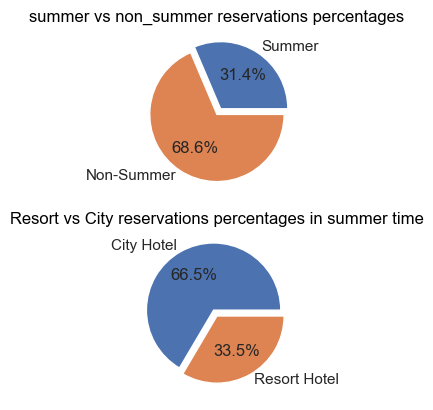

In [ ]:
fig ,axes = plt.subplots(2,1)

axes[0].pie([num_summer_reservations , num_non_summer_reservations]
        , explode=(0.1,0),
            labels= ['Summer',
                    'Non-Summer'], autopct = '%.1f%%' )
axes[0].set_title('summer vs non_summer reservations percentages' , color ='black')



axes[1].pie(fraction_summer_reservations
        ,explode=(0.1,0),
            labels= ['City Hotel',
                    'Resort Hotel'], autopct = '%.1f%%')
axes[1].set_title('Resort vs City reservations percentages in summer time', color ='black')


plt.show()


The percentage of summer reservations stands at 31.4%, indicating that the majority of hotel bookings occur outside the summer months. At first glance, this suggests that to increase revenue, our focus should not be on  enhancing the summer reservation process, let' take a further look by analyzing the Revenue in summer and non summer months.

In [ ]:
summer_adr_avg = summer_data.adr.mean()
non_summer_adr_avg = non_summer_data.adr.mean()

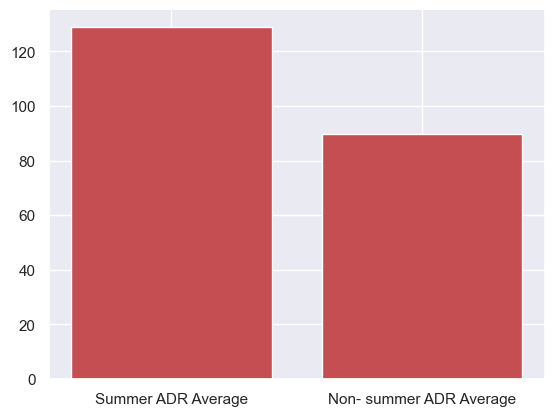

In [ ]:
labels = ['Summer ADR Average' , 'Non- summer ADR Average']
avgs = [summer_adr_avg , non_summer_adr_avg]
plt.bar(labels, avgs , color = 'r')
plt.show()

The bar plot reveals a significantly higher summer ADR compared to non-summer months. This suggests a closer look at summer data, particularly to assess if focusing on Resort hotel bookings during summer could be beneficial.

In [ ]:
resort_summer_data = summer_data[summer_data.hotel == 'Resort Hotel']
city_summer_data = summer_data[summer_data.hotel == 'City Hotel']

resort_adr_summer_avg =  resort_summer_data.adr.mean()
city_adr_summer_avg = city_summer_data.adr.mean()

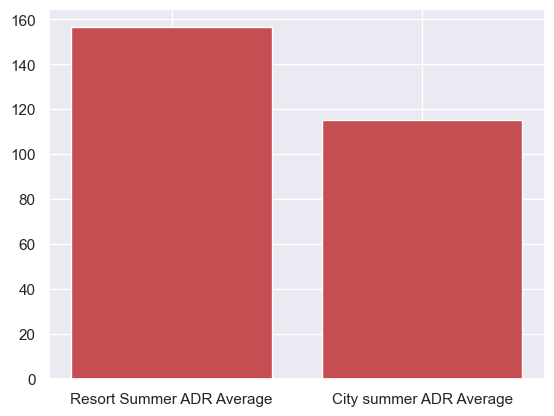

In [ ]:
labels = ['Resort Summer ADR Average' , 'City summer ADR Average']
avgs = [resort_adr_summer_avg , city_adr_summer_avg]
plt.bar(labels, avgs , color = 'r')
plt.show()

Our analysis reveals a significantly higher Summer ADR for resort hotels compared to city hotels. This finding aligns with our previous observation of higher overall summer revenue. These insights suggest that summer could be a strategic season to prioritize resort bookings for maximizing revenue.

Therefore, if we want to increase overall revenue, the first place to start is by focusing on the **summer season**, especially on the **resort booking process**.

